In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
import scipy as sc

In [251]:
file = r"C:\Repositorios\Simulacao_MIT\Classificador\MLP\dataset\csv_files\Falha_3B_Adjacentes_csv\b000c60c100b3_a.csv"

In [252]:
df = pd.read_csv(file, usecols = ["a", "b", "c"])
df

,a,b,c
0,-0.524597,-2.147675,-5.000000
1,-0.416870,-2.200470,-5.000000
2,-0.412445,-2.269592,-5.000000
3,-0.285492,-2.248688,-4.543915
4,-0.260925,-2.319336,-3.781891
...,...,...,...
99995,-2.038727,0.489349,0.533142
99996,-2.012634,0.477295,0.493164
99997,-2.036133,0.435791,0.455933
99998,-2.006073,0.425262,0.433044


Frequencia de operação:  [61.]
Freq mínima:  60.1826
Freq máxima:  48.129


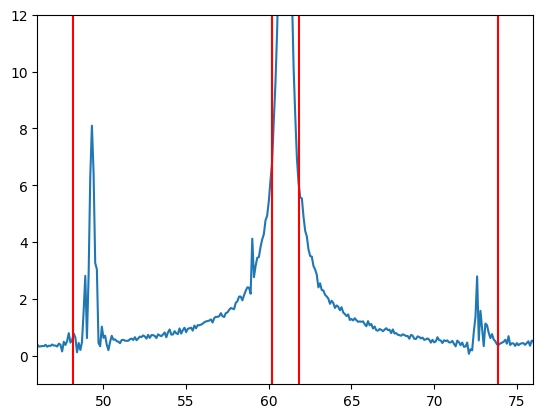

In [253]:
signal  = df.a[0:100000]
fft_fs = 10000
fft_Ts = 1/fft_fs

fft = np.fft.fft(signal, norm = "ortho")
fft = fft[range(int(len(signal)/2))]

tpCount = len(signal)
values = np.arange(int(tpCount/2))
timePeriod = tpCount/fft_fs
freq = values/timePeriod

#Achar a frequencia fundamental 
max_index = np.where(abs(fft) == np.amax(abs(fft)))
com_freq = freq[max_index]
print("Frequencia de operação: ", com_freq)

#Verificar a faixa de busca pela componente 
s = 0.67 / 100
s2 = 10.55 / 100
fbqnmin = (1 - 2*1*s)*com_freq[0]
fbqnmax = (1 - 2*1*s2)*com_freq[0]
fbqpmin = (1 + 2*1*s)*com_freq[0]
fbqpmax = (1 + 2*1*s2)*com_freq[0]
print("Freq mínima: ", fbqnmin)
print("Freq máxima: ", fbqnmax)
zoom =  15
plt.plot(freq, abs(fft))
plt.axvline(x = fbqnmin, color = 'r')
plt.axvline(x = fbqnmax, color = 'r')
plt.axvline(x = fbqpmin, color = 'r')
plt.axvline(x = fbqpmax, color = 'r')
plt.xlim([com_freq[0]-zoom, com_freq[0] +  zoom])
plt.ylim([-1,12])
plt.show()

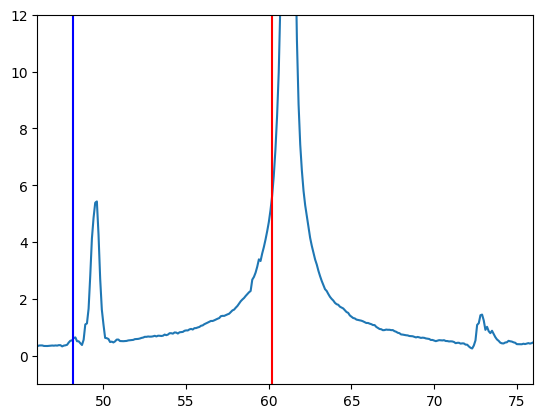

In [254]:
fft_df = pd.DataFrame(abs(fft), columns = ["a"])
# fft_df = fft_df.rolling(30).mean()
y = fft_df.a.rolling(5).mean()
y
plt.plot(freq, y)
plt.axvline(x = fbqnmin, color = 'r')
plt.axvline(x = fbqnmax, color = 'b')
plt.xlim([com_freq[0]-zoom, com_freq[0] +  zoom])
plt.ylim([-1,12])
plt.show()

In [255]:
fft_df.a

0        128.401051
1          0.309385
2          0.127548
3          0.131753
4          0.188020
            ...    
49995      0.129304
49996      0.024308
49997      0.060941
49998      0.019364
49999      0.028687
Name: a, Length: 50000, dtype: float64

In [256]:
#Algoritmo para busca das componentes de frequencia 
fbqnmin
fbqnmax
com_freq
var = 0
store_freq_n = [0]
store_value_n = [0]
f_passado = round(fbqnmin,1)
count = 0
f_atual = round(fbqnmin,1)
while(f_atual >= fbqnmax):
    f_atual = f_passado - 0.1
    test = y[int(f_atual*10)] - y[int(f_passado*10)]
    if(test > 0):
        count = count + 1
    else:
        if(var):
            store_freq_n.append(f_passado)
            store_value_n.append(y[int(f_passado*10)])
            var = 0
        count = 0
    if(count == 2):
        var = 1
    f_passado = f_atual
    



In [257]:
store_freq_n

[0,
 54.39999999999992,
 54.099999999999916,
 53.399999999999906,
 50.99999999999987,
 49.699999999999854,
 48.399999999999835]

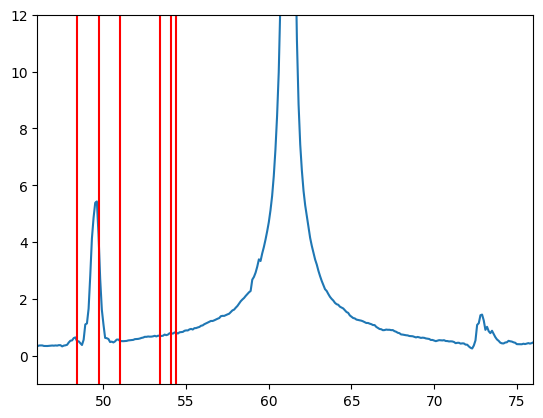

In [258]:
plt.plot(freq, y)
for i in range(len(store_freq_n)-1):
    plt.axvline(x = store_freq_n[i+1], color = 'r')
plt.xlim([com_freq[0]-zoom, com_freq[0] +  zoom])
plt.ylim([-1,12])
plt.show()

In [259]:
#Algoritmo para busca das componentes de frequencia 
var = 0
store_freq_p = [0]
store_value_p = [0]
f_passado = round(fbqpmin,1)
count = 0
f_atual = round(fbqpmin,1)
while(f_atual <= fbqpmax):
    f_atual = f_passado + 0.1
    # test = fft_df.a[int(f_atual*10)] - fft_df.a[int(f_passado*10)]
    test = y[int(f_atual*10)] - y[int(f_passado*10)]
    if(test > 0):
        count = count + 1
    else:
        if(var):
            store_freq_p.append(f_passado)
            store_value_p.append(y[int(f_passado*10)])
            var = 0
        count = 0
    if(count == 2):
        var = 1
    f_passado = f_atual

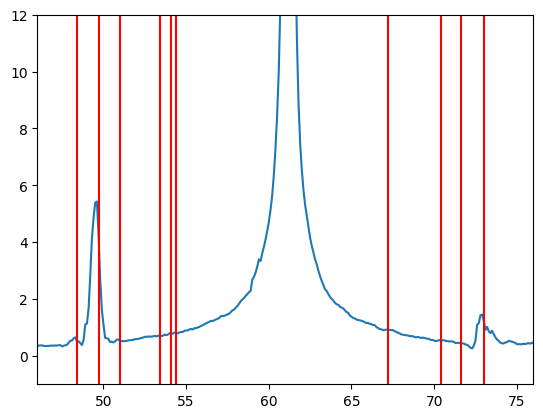

In [260]:
plt.plot(freq, y)
for i in range(len(store_freq_n)-1):
    plt.axvline(x = store_freq_n[i+1], color = 'r')
for i in range(len(store_freq_p)-1):
    plt.axvline(x = store_freq_p[i+1], color = 'r')     
plt.xlim([com_freq[0]-zoom, com_freq[0] +  zoom])
plt.ylim([-1,12])
plt.show()

In [261]:
max_freq_n = store_freq_n[store_value_n.index(max(store_value_n))]
max_freq_p = store_freq_p[store_value_p.index(max(store_value_p))]

print("Freq max pos = ", max_freq_p)
print("Freq max neg = ", max_freq_n)

Freq max pos =  72.99999999999952
Freq max neg =  49.699999999999854


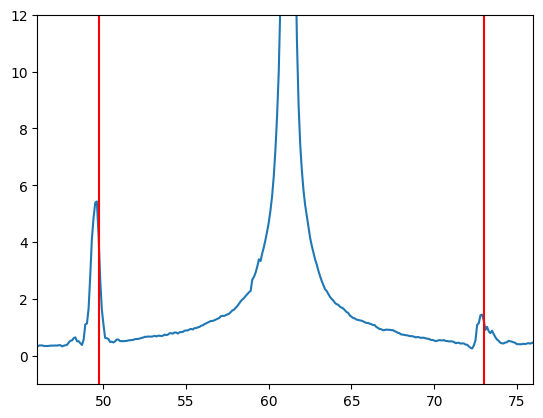

In [262]:
plt.plot(freq, y)
plt.axvline(x = max_freq_p, color = 'r')
plt.axvline(x = max_freq_n, color = 'r')     
plt.xlim([com_freq[0]-zoom, com_freq[0] +  zoom])
plt.ylim([-1,12])
plt.show()

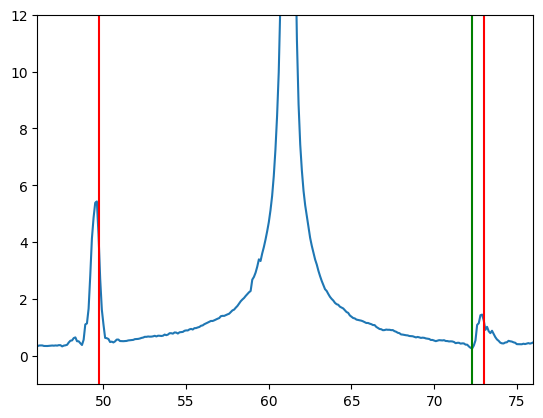

In [263]:
max_freq_p2 = com_freq + (com_freq - max_freq_n)
plt.plot(freq, y)
plt.axvline(x = max_freq_p, color = 'r')
plt.axvline(x = max_freq_n, color = 'r') 
plt.axvline(x = max_freq_p2, color = 'g')       
plt.xlim([com_freq[0]-zoom, com_freq[0] +  zoom])
plt.ylim([-1,12])
plt.show()

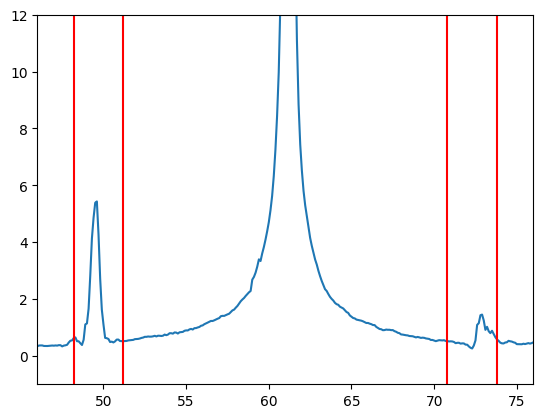

In [264]:
#Criando uma faixa com base na frequencia encontrada no passo anterior
max_freq_p2 = com_freq[0] + (com_freq[0] - max_freq_n)
plt.plot(freq, y)
plt.axvline(x = max_freq_n+1.5, color = 'r')
plt.axvline(x = max_freq_n-1.5, color = 'r')
# plt.axvline(x = max_freq_n, color = 'r') 
plt.axvline(x = max_freq_p2+1.5, color = 'r')    
plt.axvline(x = max_freq_p2-1.5, color = 'r')   
plt.xlim([com_freq[0]-zoom, com_freq[0] +  zoom])
plt.ylim([-1,12])
plt.show()

In [280]:
nfreq_range1 = max_freq_n-1.5
nfreq_range2 = max_freq_n+1.5
pfreq_range1 = max_freq_p2-1.5
pfreq_range2 = max_freq_p2+1.5

pfreq_range1

70.80000000000015

In [281]:
nfreq_range1 = round(nfreq_range1,1)
nfreq_range2 = round(nfreq_range2,1)
pfreq_range1 = round(pfreq_range1,1)
pfreq_range2 = round(pfreq_range2,1)
ymax_n = max(y[int(nfreq_range1*10):int(nfreq_range2*10)])
print(ymax_n)
pfreq_range2
ymax_p = max(y[int(pfreq_range1*10):int(pfreq_range2*10)])
print(ymax_p)
# nfreq_range1 = round(nfreq_range1,1)

5.4309560372891115
1.4512669170716614


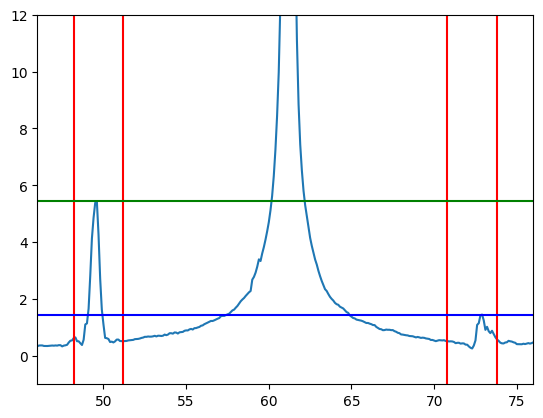

In [283]:
max_freq_p2 = com_freq[0] + (com_freq[0] - max_freq_n)
plt.plot(freq, y)
plt.axvline(x = max_freq_n+1.5, color = 'r')
plt.axvline(x = max_freq_n-1.5, color = 'r')
# plt.axvline(x = max_freq_n, color = 'r') 
plt.axvline(x = max_freq_p2+1.5, color = 'r')    
plt.axvline(x = max_freq_p2-1.5, color = 'r')
plt.axhline(y = ymax_n, color = 'g')
plt.axhline(y = ymax_p, color = 'b')
plt.xlim([com_freq[0]-zoom, com_freq[0] +  zoom])
plt.ylim([-1,12])
plt.show()